# Sprint 8: Recopilación y almacenamiento de datos

## 🎯 Objetivo General:

Comprender qué es una base de datos relacional, cómo se estructura en tablas, y cómo utilizar SQL para consultar información.

Vas a aprender:
* DBMS - Database Management System: PostgreSQL
* Tablas - Definición
* Cómo escribir consultas SQL
* Cómo obtener slices de datos usando el comando WHERE
* Cómo puedes cambiar los tipos de datos utilizando CAST
* Cómo llamar a funciones de agregación

## 🧩 1. ¿Qué es una base de datos?

Una base de datos es una colección organizada de información que puede ser fácilmente accedida, gestionada y actualizada.

**📁 Ejemplo real:** Listado de estudiantes de una universidad, catálogo de productos, historial médico.

**🧱 Relacional:** Basada en tablas con filas y columnas que se relacionan entre sí.

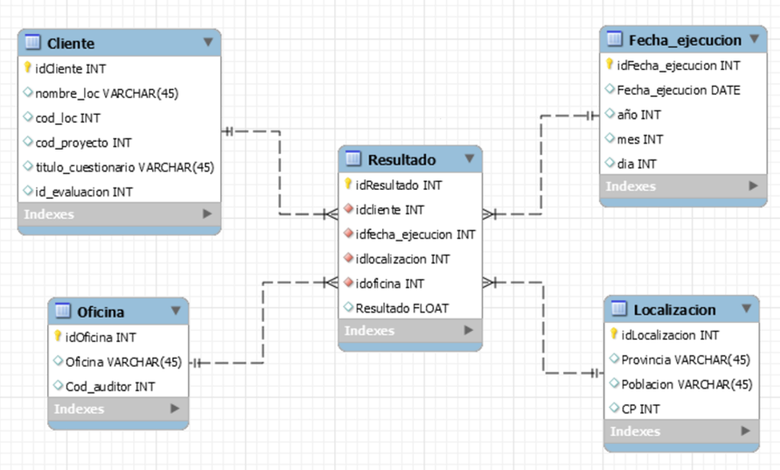

## 🧠 4. ¿Qué es SQL?

**SQL (Structured Query Language)** es el lenguaje estándar para interactuar con bases de datos relacionales.

[Video Explicativo](https://www.youtube.com/watch?v=6S8A-1jBD5Y)

# La Base de datos CHINAHOOK

[Hoja Informativa](https://practicum-content.s3.us-west-1.amazonaws.com/new-markets/Data_sprint_6/ES/Hoja_informativa_SQL_como_herramienta_para_trabajar_con_datos.pdf?etag=d6af43e8fdcdb99e3cd8b07ba5035de4)

**ERD** (*Entity Relationship Diagram*)

Es una representación visual de las relaciones entre todas las tablas relevantes dentro de una base de datos.


* **Primary Key​:** Es un identificador unico para cada fila en una tabla

* **Foreign Key​:**
Es una columna o conjunto de columnas en una tabla que establece una relación con la clave primaria (primary key) de otra tabla.

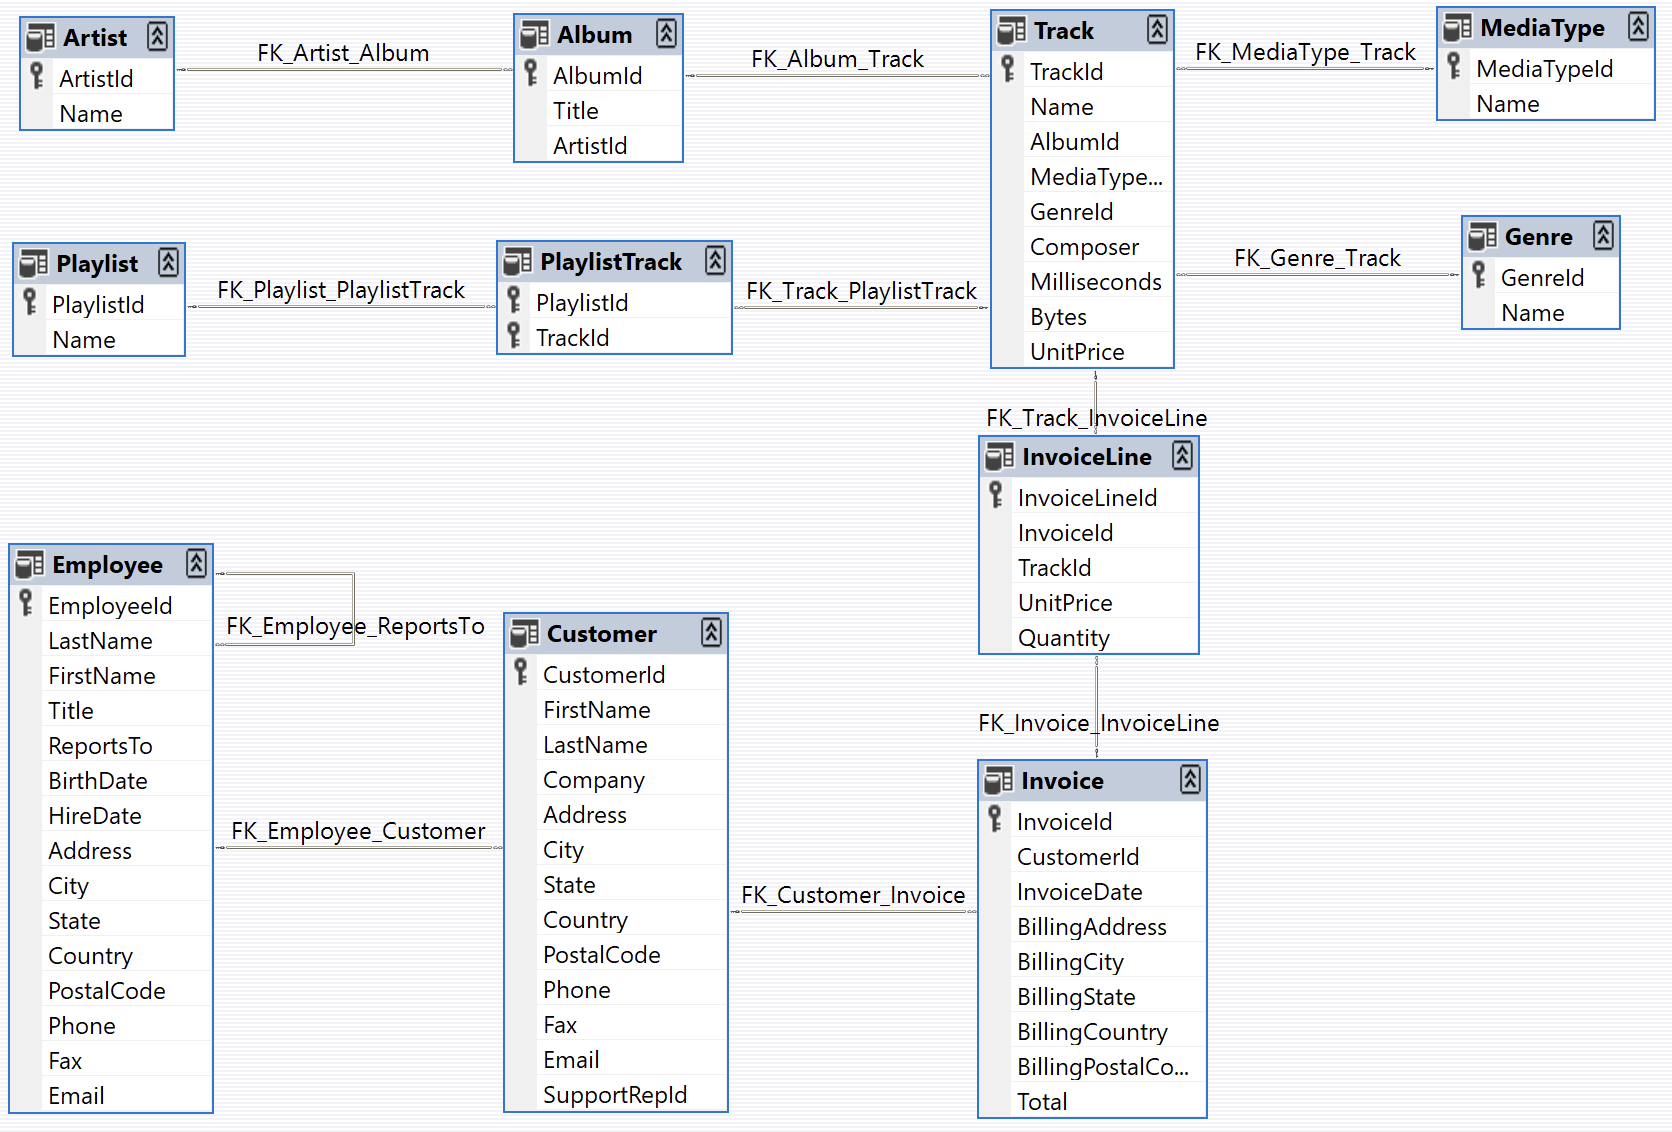

In [1]:
# Paso 1: Descargar el archivo desde GitHub
!wget -O chinook.db https://github.com/lerocha/chinook-database/raw/master/ChinookDatabase/DataSources/Chinook_Sqlite.sqlite

# Paso 2: Instalar ipython-sql si no está instalada
!pip install -q ipython-sql

# Paso 3: Cargar extensión y conectar a la base
%load_ext sql
%config SqlMagic.style = 'PLAIN_COLUMNS'
%sql sqlite:///chinook.db


"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


# Conexión a Database y Querys Básicas

In [2]:
import sqlite3
import pandas as pd

# Hacemos la conexión a la Database
conn = sqlite3.connect("chinook.db")

# Redactamos la Query
query= '''
SELECT name
FROM sqlite_master
WHERE type='table';
'''
#Consultamos e imprimimos resultado
pd.read_sql(query, conn)




,name
0,Album
1,Artist
2,Customer
3,Employee
4,Genre
5,Invoice
6,InvoiceLine
7,MediaType
8,Playlist
9,PlaylistTrack


## SELECT - FROM - WHERE

In [3]:
#Una query sencilla para conocer la tabla Album

# * selecciona todo

query='''
SELECT *
FROM Album;
'''

pd.read_sql(query, conn)


,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2
3,4,Let There Be Rock,1
4,5,Big Ones,3
...,...,...,...
342,343,Respighi:Pines of Rome,226
343,344,Schubert: The Late String Quartets & String Qu...,272
344,345,Monteverdi: L'Orfeo,273
345,346,Mozart: Chamber Music,274


In [4]:
# Podemos indicar una o varios campos que queremos consultar

query='''
SELECT ArtistId, Title
FROM Album;
'''


pd.read_sql(query, conn)

,ArtistId,Title
0,1,For Those About To Rock We Salute You
1,2,Balls to the Wall
2,2,Restless and Wild
3,1,Let There Be Rock
4,3,Big Ones
...,...,...
342,226,Respighi:Pines of Rome
343,272,Schubert: The Late String Quartets & String Qu...
344,273,Monteverdi: L'Orfeo
345,274,Mozart: Chamber Music


In [5]:
query='''
SELECT FirstName,LastName,City FROM Employee;
'''

pd.read_sql(query, conn)

,FirstName,LastName,City
0,Andrew,Adams,Edmonton
1,Nancy,Edwards,Calgary
2,Jane,Peacock,Calgary
3,Margaret,Park,Calgary
4,Steve,Johnson,Calgary
5,Michael,Mitchell,Calgary
6,Robert,King,Lethbridge
7,Laura,Callahan,Lethbridge


### 1. Mostrar los nombres y países de los clientes de Brasil

In [6]:
query='''
SELECT FirstName, LastName, city
FROM Customer
WHERE Country = 'Brazil';
'''

pd.read_sql(query, conn)


,FirstName,LastName,City
0,Luís,Gonçalves,São José dos Campos
1,Eduardo,Martins,São Paulo
2,Alexandre,Rocha,São Paulo
3,Roberto,Almeida,Rio de Janeiro
4,Fernanda,Ramos,Brasília


### 2. Clientes de Canadá o Alemania

In [7]:
query='''
SELECT FirstName, LastName, City, Country
FROM Customer
WHERE Country = 'Canada' OR Country = 'Germany';
'''

pd.read_sql(query, conn)

,FirstName,LastName,City,Country
0,Leonie,Köhler,Stuttgart,Germany
1,François,Tremblay,Montréal,Canada
2,Mark,Philips,Edmonton,Canada
3,Jennifer,Peterson,Vancouver,Canada
4,Robert,Brown,Toronto,Canada
5,Edward,Francis,Ottawa,Canada
6,Martha,Silk,Halifax,Canada
7,Aaron,Mitchell,Winnipeg,Canada
8,Ellie,Sullivan,Yellowknife,Canada
9,Hannah,Schneider,Berlin,Germany


In [8]:
query='''
SELECT CustomerId,FirstName,City
FROM Customer
WHERE State='CA';
'''

pd.read_sql(query, conn)

,CustomerId,FirstName,City
0,16,Frank,Mountain View
1,19,Tim,Cupertino
2,20,Dan,Mountain View


### 3. Clientes que no vivan en USA

In [9]:
query='''
SELECT FirstName, LastName, City, Country
FROM Customer
WHERE Country != "USA";
'''

pd.read_sql(query, conn)

,FirstName,LastName,City,Country
0,Luís,Gonçalves,São José dos Campos,Brazil
1,Leonie,Köhler,Stuttgart,Germany
2,François,Tremblay,Montréal,Canada
3,Bjørn,Hansen,Oslo,Norway
4,František,Wichterlová,Prague,Czech Republic
5,Helena,Holý,Prague,Czech Republic
6,Astrid,Gruber,Vienne,Austria
7,Daan,Peeters,Brussels,Belgium
8,Kara,Nielsen,Copenhagen,Denmark
9,Eduardo,Martins,São Paulo,Brazil


### 4. Clientes con CustomerId entre 5 y 10

In [10]:
query='''
SELECT CustomerId, FirstName, LastName
FROM Customer
WHERE CustomerId BETWEEN 5 AND 10;
'''

pd.read_sql(query, conn)

,CustomerId,FirstName,LastName
0,5,František,Wichterlová
1,6,Helena,Holý
2,7,Astrid,Gruber
3,8,Daan,Peeters
4,9,Kara,Nielsen
5,10,Eduardo,Martins


### 5. Facturas (Invoice) con montos totales entre 10 y 20 USD

In [11]:
query='''
SELECT InvoiceId, CustomerId, Total
FROM Invoice
WHERE Total BETWEEN 10 AND 20;
'''

pd.read_sql(query, conn)

,InvoiceId,CustomerId,Total
0,5,23,13.86
1,12,2,13.86
2,19,40,13.86
3,26,19,13.86
4,33,57,13.86
5,40,36,13.86
6,47,15,13.86
7,54,53,13.86
8,61,32,13.86
9,68,11,13.86


## FUNCIONES DE AGREGACION

* `COUNT( name )  AS othername`
* `COUNT(DISTINCT name) AS othername`
* `SUM( name) AS othername`
* `AVG(name) AS othername`
* `MIN(name) AS othername`
* `MAX(name) AS othername`



In [12]:
query='''
SELECT COUNT(CustomerId) AS TotalClientes
FROM Customer;
'''

pd.read_sql(query, conn)


,TotalClientes
0,59


In [13]:
query='''
SELECT COUNT(Country) AS TotalPaises
FROM Customer;
'''

pd.read_sql(query, conn)

,TotalPaises
0,59


In [14]:
query='''
SELECT COUNT(DISTINCT Country) AS TotalPaises
FROM Customer;
'''

pd.read_sql(query, conn)

,TotalPaises
0,24


In [15]:
query='''
SELECT SUM(Total) AS TotalVentas
FROM Invoice;
'''

pd.read_sql(query, conn)


,TotalVentas
0,2328.6


In [16]:
query='''
SELECT AVG(Total) AS PromedioVentas
FROM Invoice
WHERE InvoiceDate BETWEEN '2009-01-01' AND '2011-12-31';
'''

pd.read_sql(query, conn)


,PromedioVentas
0,None


In [17]:
query='''
SELECT MIN(Total) AS FacturaMinima,
       MAX(Total) AS FacturaMaxima
FROM Invoice;
'''

pd.read_sql(query, conn)

,FacturaMinima,FacturaMaxima
0,0.99,25.86


In [18]:
query='''
SELECT
    MAX(Total) - MIN(Total) AS DiferenciaTotal
FROM
    Invoice
WHERE
    BillingCountry = 'Canada';

'''

pd.read_sql(query, conn)

,DiferenciaTotal
0,12.87


### TIPOS DE DATOS: CONVERSIONES

Los más comunes son:

* INTEGER para números enteros,
* REAL o FLOAT para números decimales
* TEXT para cadenas de caracteres (como nombres o descripciones)
* DATE para fechas.

In [19]:
query='''
SELECT CAST('123' AS INTEGER) AS numero;
'''

pd.read_sql(query, conn)


,numero
0,123


In [20]:
query='''
SELECT CAST(456 AS TEXT) AS texto;
'''

pd.read_sql(query, conn)

,texto
0,456


In [21]:
query='''
SELECT DATE('2023-06-26') AS fecha_valida;
'''

pd.read_sql(query, conn)

,fecha_valida
0,2023-06-26


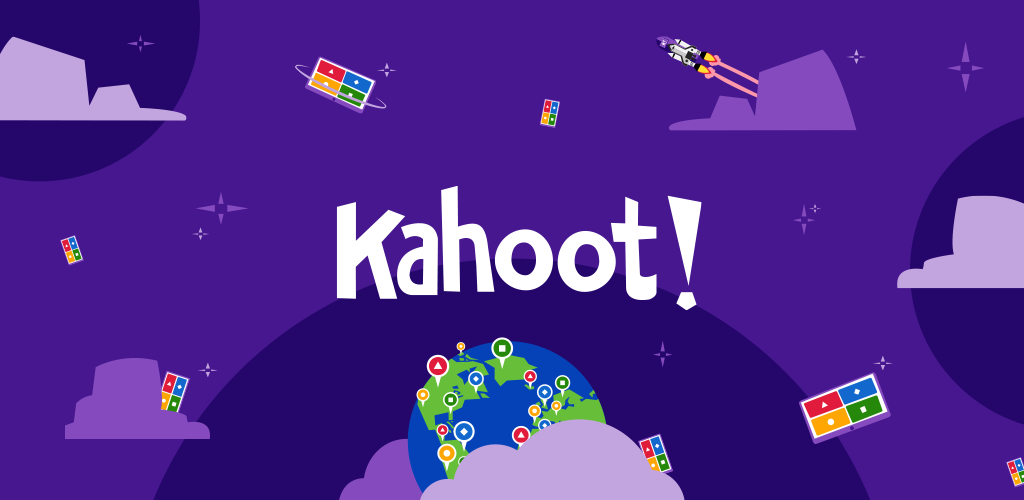

## TIME TO PRACTICE!!

[texto del enlace](https://www.hackerrank.com/domains/sql?filters%5Bskills%5D%5B%5D=SQL%20%28Basic%29)